In [141]:
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import descartes
%matplotlib inline
from random import sample
from math import sin, cos, sqrt, atan2, radians
import numpy as np

lakes = geopandas.read_file("Lakes_and_Rivers")
madison = geopandas.read_file("City_Limit")


In [167]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus = geopandas.read_file("Metro_Transit_Ridership_by_Route_Weekday")




In [143]:
#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')

#BRT data 
#https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-stops
# using new data for brt from the madison data instead of the BRT.gdb
brt_data = geopandas.read_file("Bus_Rapid_Transit_Stops")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')



In [178]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161

list_weekday_bus = []
for index, row in weekday_bus.iterrows():
    list_weekday_bus.append(row["geometry"])
    
weekday_bus_series = pd.Series(list_weekday_bus)
weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')


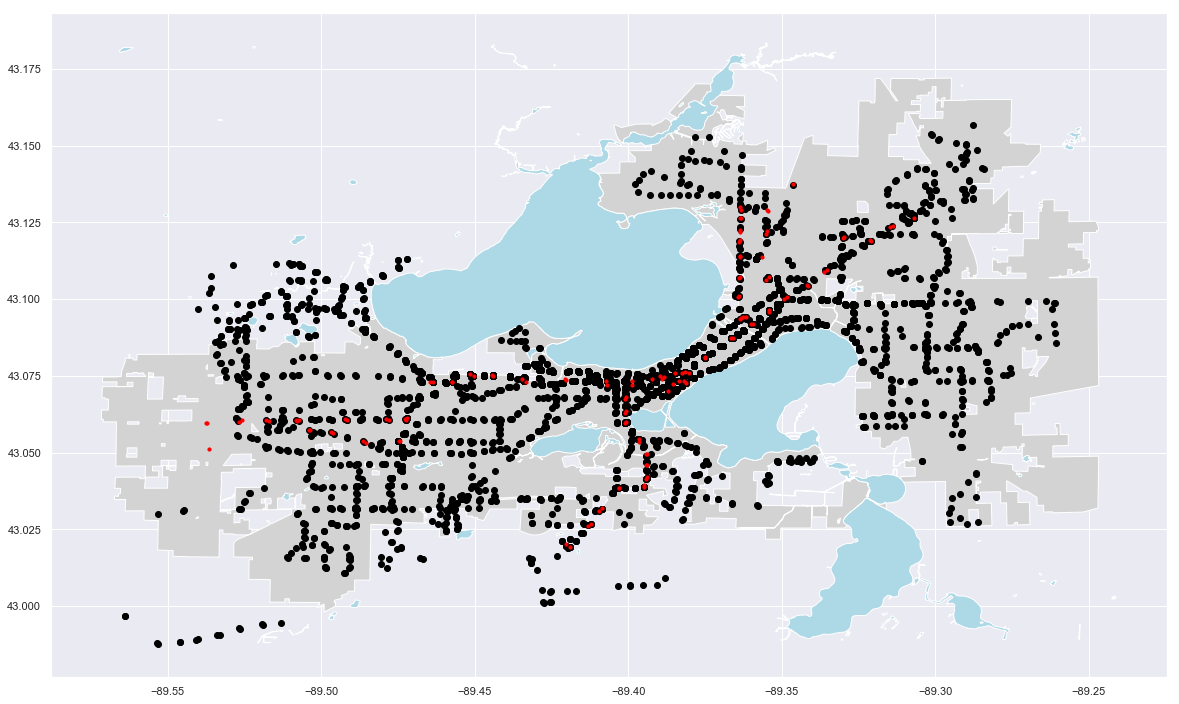

In [145]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
weekday_bus_coord.plot(color='black', ax=ax)
brt_coord.plot(color="red", ax=ax, markersize= 10)

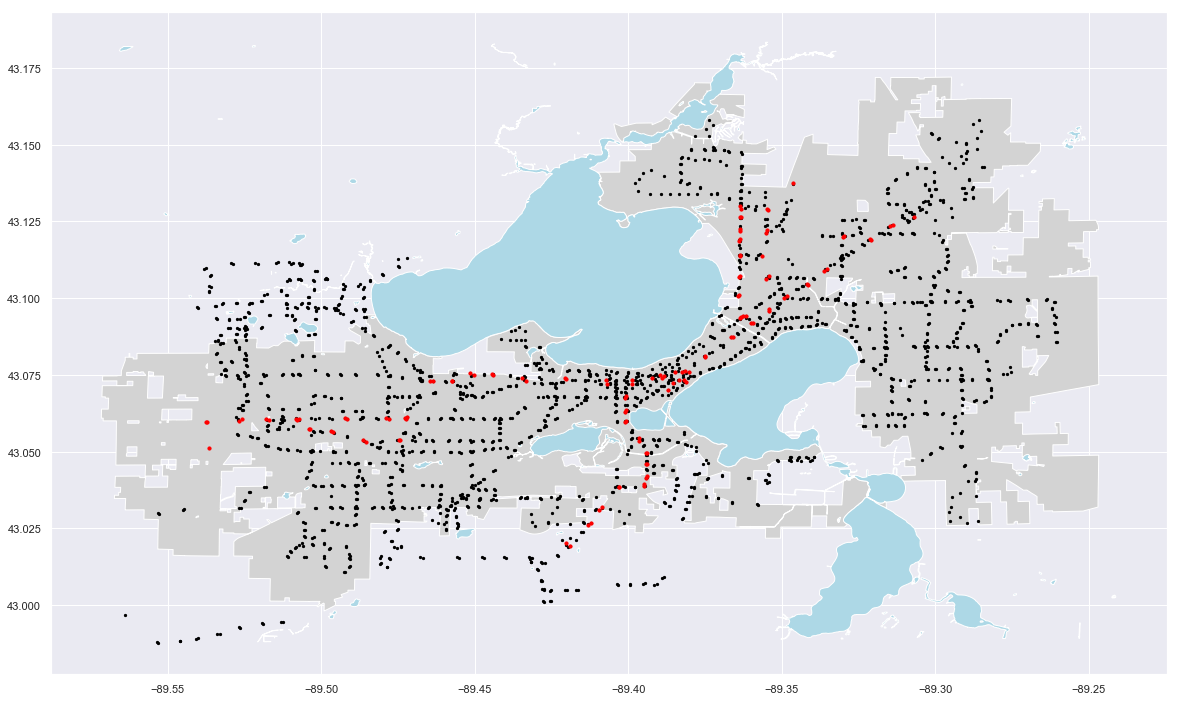

In [149]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 10)

In [150]:
#problem with weekday_ridership_data from madison data open data. does not show the route

In [208]:
#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
transit_data = geopandas.read_file("Metro_Transit_Bus_Route_Trips")
transit_data_weekday = transit_data.loc[transit_data['service_na'].isin(['Standard Weekday','Weekday'])]
transit_data_weekday


,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,...,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
0,22069,50881,50881,8298,1,85_WKD,874327,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
1,22070,50881,50881,8298,1,85_WKD,874326,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
2,22071,50881,50881,8298,1,85_WKD,874325,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
3,22072,50881,50881,8298,1,85_WKD,874324,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
4,22073,50881,50881,8298,1,85_WKD,874323,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
5,22074,50881,50881,8298,1,85_WKD,874322,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
6,22075,50882,50882,8298,1,85_WKD,874328,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
7,22076,50882,50882,8298,1,85_WKD,874329,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
8,22077,50882,50882,8298,1,85_WKD,874330,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
9,22078,50882,50882,8298,1,85_WKD,874331,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."


In [207]:
weekday_bus.head()

,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,geometry
0,19341,7215,16,43.084090,-89.325022,9.72,97179.20,POINT (-89.32501598855713 43.08408205170329)
1,19342,7215,31,43.084090,-89.325022,4.01,40110.65,POINT (-89.32501598855713 43.08408205170329)
2,19343,7215,37,43.084090,-89.325022,2.52,25165.14,POINT (-89.32501598855713 43.08408205170329)
3,19344,7215,38,43.084090,-89.325022,10.26,102564.00,POINT (-89.32501598855713 43.08408205170329)
4,19345,7219,35,43.067971,-89.281743,0.33,3338.55,POINT (-89.28173700253664 43.06796305245022)


In [191]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus_with_brt_distance = geopandas.read_file("weekday_bus_with_brt_distance.gpkg")



In [206]:
weekday_bus_with_brt_distance.head()

,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,brt_index,distance_to_brt,geometry
0,19341,7215,16,43.084090,-89.325022,9.72,97179.20,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
1,19342,7215,31,43.084090,-89.325022,4.01,40110.65,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
2,19343,7215,37,43.084090,-89.325022,2.52,25165.14,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
3,19344,7215,38,43.084090,-89.325022,10.26,102564.00,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
4,19345,7219,35,43.067971,-89.281743,0.33,3338.55,22,0.06370905034348112,POINT (-89.28173700253664 43.06796305245022)


In [214]:
brt_data.head()

,OBJECTID,stop_id,stop_name,stop_lat,stop_lon,MetroID,Notes,Type,geometry
0,1,91002.0,EB W JOHNSON fs ORCHARD,43.072131,-89.406937,581.0,Relo back from ns Charter,None,POINT (-89.40693696927157 43.07213068841592)
1,2,91003.0,EB W JOHNSON fs E CAMPUS MALL,43.071971,-89.398723,NaN,None,None,POINT (-89.39872296331833 43.07197055174612)
2,3,91005.0,EB STATE ns FAIRCHILD,43.074698,-89.388293,883.0,None,None,POINT (-89.38829311063442 43.07469792125576)
3,4,91006.0,EB MAIN fs CARROLL,43.073430,-89.383650,1101.0,None,None,POINT (-89.38364989768353 43.07342977575533)
4,5,91007.0,EB EAST WASH fs WEBSTER,43.076406,-89.381458,1323.0,None,None,POINT (-89.38145786970587 43.07640581337424)


In [258]:
weekday_bus_with_brt_distance['Route'].unique()

array([16, 31, 37, 38, 35, 39, 32, 33, 30, 50, 51, 57, 56, 58, 18, 55, 52,
        6, 34, 20, 26, 36, 25, 17,  3, 27, 29,  4,  5, 14, 15,  2, 10, 11,
       12, 47, 70, 71, 72,  1, 19, 75, 28, 22, 81, 21, 44, 80, 84, 48, 67,
       13, 40, 49, 73, 82], dtype=int64)

In [260]:
# #mapping of the point

# for bus_number in weekday_bus_with_brt_distance['Route'].unique():
#     ax = madison.plot(color="lightgray", figsize=(100,100))
#     lakes.plot(color="lightblue", ax=ax)
#     brt_coord.plot(color="black", ax=ax, markersize= 5)
#     row_bus = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == bus_number]  
#     weekday_bus_series = pd.Series(row_bus["geometry"])
#     weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
#     weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
#     weekday_bus_coord.plot(color='black', ax=ax, markersize= 5)
    
#     route_row = transit_data_weekday[transit_data_weekday['trips_ro_1'] == bus_number]
#     list_weekday_bus = []
#     for index, row in route_row.iterrows():
#         list_weekday_bus.append(row["geometry"])
#         weekday_bus_series = pd.Series(list_weekday_bus)
#         weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
#         weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
#         weekday_bus_coord.plot(color='blue', ax=ax)
        
#     for index, row in row_bus.iterrows():
#         metro_point = row['geometry']
#         brt_point = brt_data.iloc[int(row['brt_index'])]['geometry']
#         line_A = LineString([[metro_point.x, metro_point.y], [brt_point.x, brt_point.y]])
#         weekday_bus_series = pd.Series(line_A)
#         weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
#         weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
#         weekday_bus_coord.plot(color='red', ax=ax)

    


weekday_bus_with_brt_distance

,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,brt_index,distance_to_brt,geometry
0,19341,7215,16,43.084090,-89.325022,9.72,97179.20,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
1,19342,7215,31,43.084090,-89.325022,4.01,40110.65,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
2,19343,7215,37,43.084090,-89.325022,2.52,25165.14,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
3,19344,7215,38,43.084090,-89.325022,10.26,102564.00,17,0.02613896106395583,POINT (-89.32501598855713 43.08408205170329)
4,19345,7219,35,43.067971,-89.281743,0.33,3338.55,22,0.06370905034348112,POINT (-89.28173700253664 43.06796305245022)
5,19346,7223,35,43.067560,-89.291297,0.17,1669.27,20,0.05942310797632797,POINT (-89.29129100010601 43.0675520522667)
6,19347,7223,39,43.067560,-89.291297,3.34,33376.46,20,0.05942310797632797,POINT (-89.29129100010601 43.0675520522667)
7,19348,7226,31,43.051751,-89.292043,0.17,1671.28,18,0.07209352617195185,POINT (-89.29203700073032 43.05174305489181)
8,19349,7230,32,43.096102,-89.291095,0.54,5389.78,22,0.03427445142245002,POINT (-89.2910889969265 43.09609404756924)
9,19350,7232,16,43.062188,-89.320363,58.48,584750.70,17,0.04716961017126581,POINT (-89.32035699229068 43.06218005515254)


In [239]:

for bus_number in weekday_bus_with_brt_distance['Route'].unique():
    row_bus = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == bus_number] 

    weekday_bus_series = pd.Series(row_bus["geometry"])
    weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
    weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')

    weekday_bus_coord.plot(color='black', ax=ax)

    for index, row in row_bus.iterrows():
        metro_point = row['geometry']
        brt_point = brt_data.iloc[int(row['brt_index'])]
        brt_point = brt_point['geometry']
        line_A = LineString([[metro_point.x, metro_point.y], [brt_point.x, brt_point.y]])
        weekday_bus_series = pd.Series(line_A)
        weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
        weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
        weekday_bus_coord.plot(color='red', ax=ax)
    break

<Figure size 432x288 with 0 Axes>

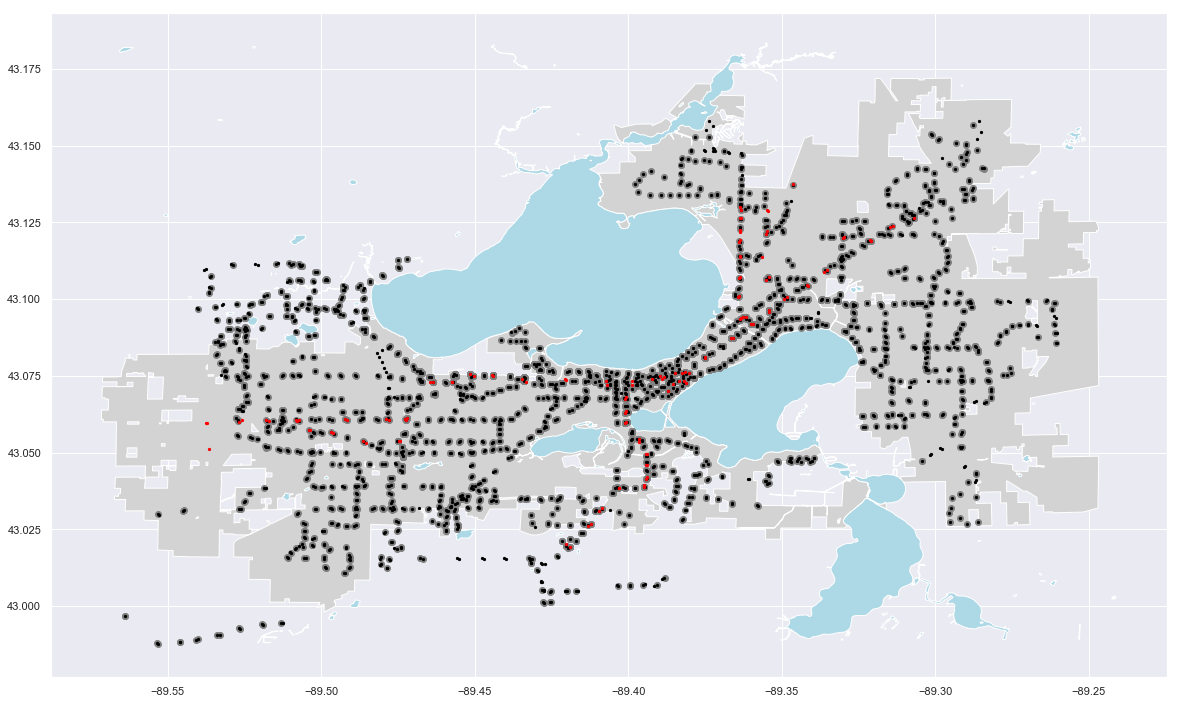

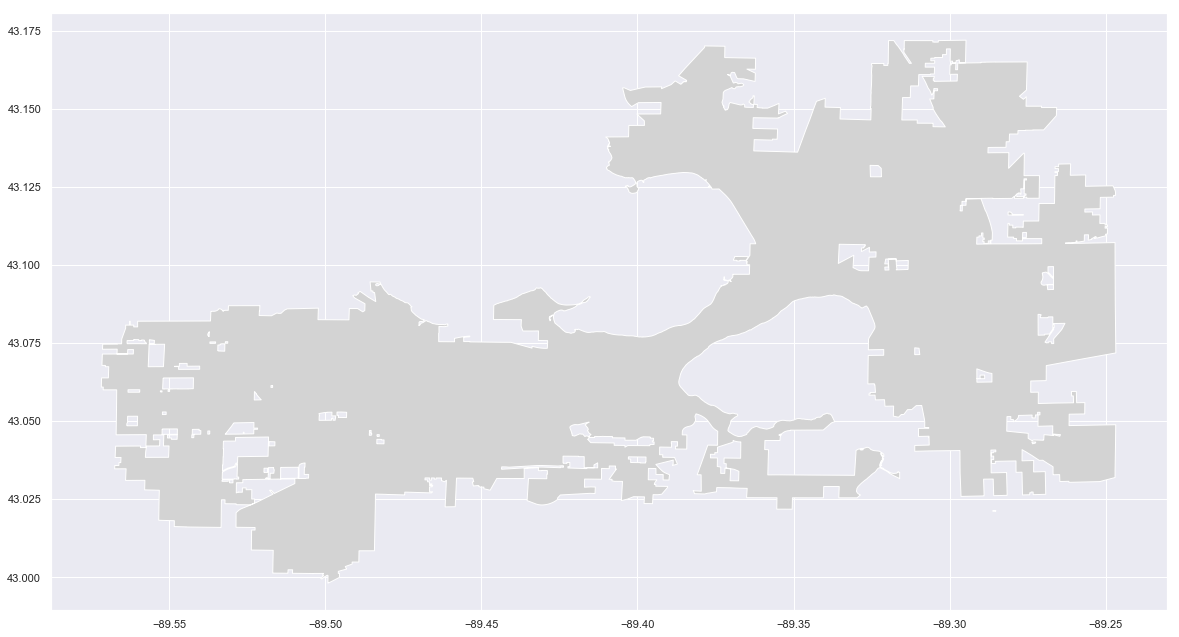

In [257]:
#mapping of the point

weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_with_brt_distance, geometry='geometry')

ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
weekday_bus_coord.plot(color='grey', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 5)


In [198]:
#mapping of the point
list_weekday_bus = []
for index, row in weekday_bus_with_brt_distance.iterrows():
    list_weekday_bus.append(row["geometry"])
    
weekday_bus_series = pd.Series(list_weekday_bus)
weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')



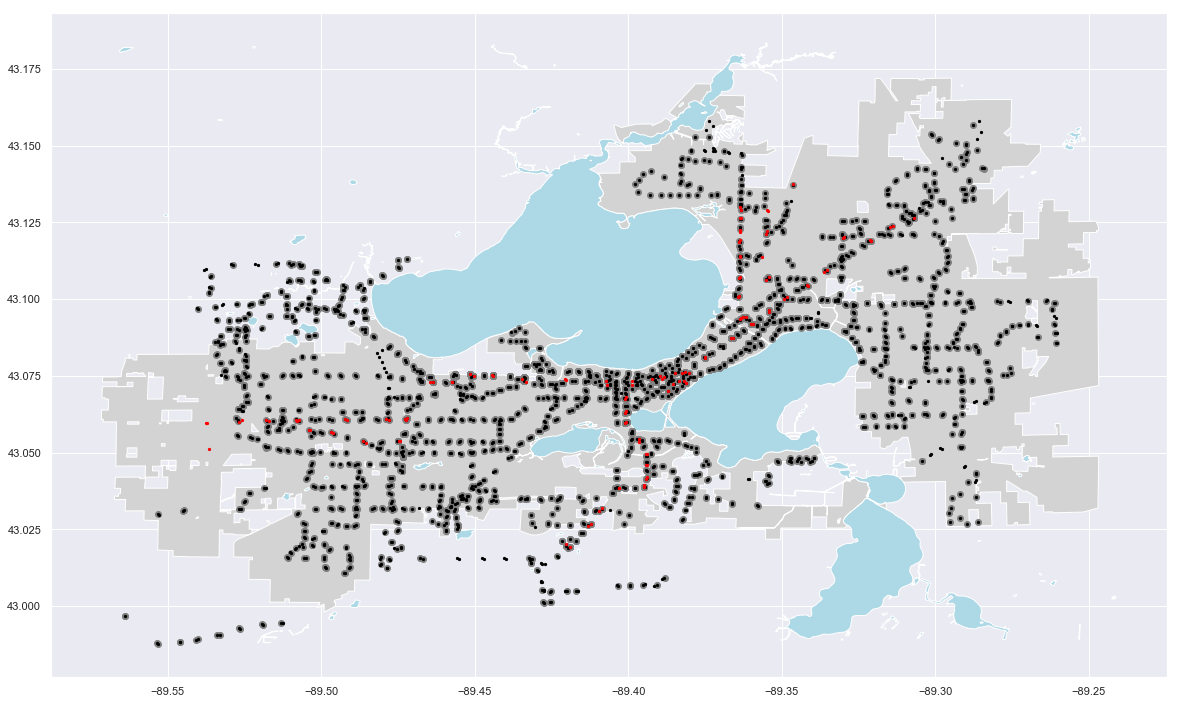

In [199]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
weekday_bus_coord.plot(color='grey', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 5)

In [ ]:
df['distance'] = np.sqrt((df.lat2 - df.lat1) ** 2 + (df.lon2 - df.lon1) ** 2)